<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
dataset = pd.read_csv('../datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

### Análisis de las variables a considerar y su significado:

 | Atribute | Meaning |
 | :------: | :-----: |
 | pf_identity_legal | Legal gender |
 | pf_identity_parental_marriage | Parental rights in marriage |
 | pf_identity_parental_divorce | Parental rights after divorce |
 | pf_identity_parental | Parental rights |
 | pf_identity_sex_male | Male-to-male relationships |
 | pf_identity_sex_female | Female-to-female relationships |
 | pf_identity_sex | Same-sex ralitionships |
 | pf_identity_divorce | Divorce |
 | pf_identity | Identity and relationships |
 
 De la publicación original:
 
 "One of the most personal decisions individuals can make regards their sexual and gender identity:  
 - _Legal gender_ measures the degree to which people are free to legally change their sex and gender. 
 - _Parental rights_ refers to the extent to which women have equal rights based in law and custom regarding “legal guardianship of a child during a marriage and custody rights over a child after divorce.” Because this indicator does not assess the nature of those rights but rather the equality of rights between genders, it is a proxy of one aspect of women’s freedom rather than a direct measure of freedom.
 - The next component rates the freedom of individuals to establish samesex relationships. It is composed of two variables from the International Lesbian and Gay Association: a _male-to-male relationship_ indicator that gauges the extent to which sexual relationships between men are legal and a _female-to-female indicator_ that gauges the same for relationships between women. 
 - The last component measures “whether women and men have the same rights to initiate divorce"."
 
 Es decir, tenemos cuadro índices de libertad personal, que son _Legal gender_, _Parental rights_, _Same-sex ralitionships_ y  _Divorce_. Dentro de _Parental rights_ se subdivide en dos índices, _Parental rights in marriage_ y _Parental rights after divorce_ y dentro de _Same-sex ralitionships_ se divide en dos sub índices, _Male-to-male relationships_ y _Female-to-female relationships_. En cada uno de estos, se promedia entre los dos sub-índices para obtener el índice.
 
 Con los cuatro índices de libertad personal, se promedia y se obtiene el _Identity and relationships_ (pf_identity).
 
 Para el caso del **hf_score**:
 
 "The  index  is  derived  from  a  total  of  79 distinct indicators (37 from the personal freedom subindex and 42 from the economic freedom  subindex).  Each  indicator is rated on a 0-10 scale, with 10 representing  the  most  freedom. We  average  the  main  components  in  each  category  to  produce  a  rating for each of the categories. To produce a final rating on the personal freedom subindex, we  average  the  Rule  of  Law  and  the  Security  and  Safety  categories  and  average  that  rating  with  the  average  of  the  remaining  categories  in  the  subindex.  In  the  economic  freedom  subindex, we have five equally weighted parts: Size  of  Government,  Legal  System  and  Prop-erty  Rights,  Sound  Money,  Freedom  to  Trade  Internationally,  and  Regulation.  To  produce  the Human Freedom Index, we average the final country ratings of the economic and personal freedom subindexes"
 

In [3]:
#De todas las columnas seleccionamos para mostrar sólo las "importantes":

important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
                    'ef_score', # Economic Freedom (score)
                    'ef_rank', # Economic Freedom (rank)
                    'hf_score', # Human Freedom (score)
                    'hf_rank', # Human Freedom (rank)
                    ]



In [4]:
# Hacemos un vistazo al contenido de esas columnas:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


In [5]:
# Hechamos un vistazo a datos en esas columnas importantes, pero sólo los provinientes de 
# América latina y el Caribe:

dataset[dataset['region'] == 'Latin America & the Caribbean'][important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
11,2016,BRD,Barbados,Latin America & the Caribbean,NaN,10.0,10.0,10.0,0.0,0.0,0.0,NaN,5.000000,6.43,111.0,7.068447,67.0
14,2016,BLZ,Belize,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,6.86,83.0,7.145432,64.0
17,2016,BOL,Bolivia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,6.23,123.0,6.718385,92.0
20,2016,BRA,Brazil,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.500000,5.75,144.0,6.207989,123.0
31,2016,CHL,Chile,Latin America & the Caribbean,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,5.000000,7.80,15.0,8.008018,32.0
33,2016,COL,Colombia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,6.50,105.0,6.760757,87.0
36,2016,CRI,Costa Rica,Latin America & the Caribbean,0.0,5.0,10.0,7.5,10.0,10.0,10.0,10.0,6.875000,7.55,33.0,7.857714,37.0
42,2016,DOM,Dominican Rep.,Latin America & the Caribbean,0.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.500000,7.18,62.0,7.061287,69.0


## 1. Estadísticos descriptivos


### Resolución
### 1.1) Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [72]:
# Se calculan los rangos (función numpy), min y max (función sobre db)
# para cada variable en su versión global y en América Latina y el Caribe (LAC).

rg_pf_i_m = np.ptp(dataset['pf_identity'].dropna())
rg_hf_s_m = np.ptp(dataset['hf_score'].dropna())
max_pf_i_m , max_hf_s_m  = dataset[['pf_identity','hf_score']].dropna().max()
min_pf_i_m , min_hf_s_m = dataset[['pf_identity','hf_score']].dropna().min()

print('Estadísticos - Mundiales: \n')
print('Libertad Personal - Identidad: ')
print('Rango: ',rg_pf_i_m)
print('Mínimo: ',min_pf_i_m,'   Máximo: ',max_pf_i_m)
print('\n')
print('Libertad Humana (Human Freedom Score): ')
print('Rango: ',rg_hf_s_m)
print('Mínimo: ',min_hf_s_m,'   Máximo: ',max_hf_s_m)
print('\n')

rg_pf_i = np.ptp(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna())
rg_hf_s = np.ptp(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())
max_pf_i , max_hf_s = dataset[dataset['region'] == 'Latin America & the Caribbean'][['pf_identity','hf_score']].dropna().max()
min_pf_i , min_hf_s = dataset[dataset['region'] == 'Latin America & the Caribbean'][['pf_identity','hf_score']].dropna().min()
print('Estadísticos - Latinoamérica y el Caribe: \n')
print('Libertad Personal - Identidad: ')
print('Rango: ',rg_pf_i)
print('Mínimo: ',min_pf_i,'   Máximo: ',max_pf_i)
print('\n')
print('Libertad Humana (Human Freedom Score): ')
print('Rango: ',rg_hf_s)
print('Mínimo: ',min_hf_s,'   Máximo: ',max_hf_s)


Estadísticos - Mundiales: 

Libertad Personal - Identidad: 
Rango:  10.0
Mínimo:  0.0    Máximo:  10.0


Libertad Humana (Human Freedom Score): 
Rango:  5.360486062
Mínimo:  3.765826877    Máximo:  9.126312939


Estadísticos - Latinoamérica y el Caribe: 

Libertad Personal - Identidad: 
Rango:  5.0
Mínimo:  5.0    Máximo:  10.0


Libertad Humana (Human Freedom Score): 
Rango:  4.089427871000001
Mínimo:  4.2007244560000006    Máximo:  8.290152327000001


### 1.2) Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [7]:


mean_pf_m, mean_hf_m = dataset[['pf_identity','hf_score']].dropna().mean()
median_pf_m, median_hf_m = dataset[['pf_identity','hf_score']].dropna().median()
std_pf_m , std_hf_m = dataset[['pf_identity','hf_score']].dropna().std()
modas_pf_hf_m , count_pf_hf_m = stats.mode(dataset[['pf_identity','hf_score']].dropna())


print('Estadísticos - Mundiales: \n')

#pf_identity:
print('Estadísticos para pf_identity:')
print('Mean: ', mean_pf_m)
print('Median: ', median_pf_m)
print('Desviación Estandar: ', std_pf_m)
print('Moda: ', modas_pf_hf_m[0][0])
print('Número de veces que se repite el valor modal: ', count_pf_hf_m[0][0])
print('\n')

#hf_score:
print('Estadísticos para hf_score:')
print('Mean: ', mean_hf_m)
print('Median: ', median_hf_m)
print('Desviación Estandar: ', std_hf_m)
print('Moda: ', modas_pf_hf_m[0][1])
print('Número de veces que se repite el valor modal: ', count_pf_hf_m[0][1])
print('\n')

mean_pf, mean_hf = dataset[dataset['region'] == 'Latin America & the Caribbean'][['pf_identity','hf_score']].dropna().mean()
median_pf ,median_hf = dataset[dataset['region'] == 'Latin America & the Caribbean'][['pf_identity','hf_score']].dropna().median()
std_pf, std_hf = dataset[dataset['region'] == 'Latin America & the Caribbean'][['pf_identity','hf_score']].dropna().std()
modas_pf_hf , count_pf_hf = stats.mode(dataset[dataset['region'] == 'Latin America & the Caribbean'][['pf_identity','hf_score']].dropna())

print('Estadísticos - Latinoamérica y el Caribe: \n')

#pf_identity:
print('Estadísticos para pf_identity:')
print('Mean: ', mean_pf)
print('Median: ', median_pf)
print('Desviación Estandar: ', std_pf)
print('Moda: ', modas_pf_hf[0][0])
print('Número de veces que se repite el valor modal: ', count_pf_hf[0][0])
print('\n')

#hf_score:
print('Estadísticos para hf_score:')
print('Mean: ', mean_hf)
print('Median: ', median_hf)
print('Desviación Estandar: ', std_hf)
print('Moda: ', modas_pf_hf_m[0][1])
print('Número de veces que se repite el valor modal: ', count_pf_hf_m[0][1])
print('\n')




Estadísticos - Mundiales: 

Estadísticos para pf_identity:
Mean:  7.33417997096807
Median:  9.166666667000001
Desviación Estandar:  3.159472661477449
Moda:  10.0
Número de veces que se repite el valor modal:  601


Estadísticos para hf_score:
Mean:  6.9934437555145
Median:  6.923840432999999
Desviación Estandar:  1.0258111611874141
Moda:  3.765826877
Número de veces que se repite el valor modal:  1


Estadísticos - Latinoamérica y el Caribe: 

Estadísticos para pf_identity:
Mean:  8.765086206909483
Median:  10.0
Desviación Estandar:  1.7117319741534658
Moda:  10.0
Número de veces que se repite el valor modal:  136


Estadísticos para hf_score:
Mean:  7.047981929952582
Median:  7.02804474
Desviación Estandar:  0.6089040915687837
Moda:  3.765826877
Número de veces que se repite el valor modal:  1




Calcular la moda en el caso de hf_score, no tiene sentido, porque las probabilidades de que se repita un valor del índice es muy baja, por eso nos da como moda el menor valor, que se repite 1 vez. Por la cantidad de índices (alguno de los cuales ya son inclusive promedios) que promedia en su cálculo, es muy dificil obtener varias veces el mismo valor. Para que se repitiese se necesitarían muchos más datos. 

Se podría calcular una moda dividiendo en intervalos el rango de la variable (como en un histograma), perdiendo presición en el indicador de posición pero teniendo alguna información de la distribución de la variable.

En el caso de pf_identity sí tendría sentido, debido a que su calculo es más sencillo (incluye menos sub-índices) entonces es más facil que se repita un valor.


### Comparación:

Para el caso de la **libertad personal - identidad** *(pf_identity)*:

| Estadístico         | Mundial | Latinoamérica y el Caribe |
| :-----------------: | :-----: | :-----------------------: |
| Media               | 7.33    | 8.77                      |
| Mediana             | 9.17    | 10.0                      |
| Desviación Estandar | 3.16    | 1.71                      |
| Rango               | 10.0    | 5.0                       |
| Mínimo              | 0.0     | 5.0                       | 
| Máximo              | 10.0    | 10.0                      |  

Para el índice de **libertad humana** *(hf_score)*:

| Estadístico         | Mundial | Latinoamérica y el Caribe |
| :-----------------: | :-----: | :-----------------------: |
| Media               | 6.99    | 7.05                      |
| Mediana             | 6.92    | 7.03                      |
| Desviación Estandar | 1.03    | 0.61                      |
| Rango               | 5.36    | 4.09                      |
| Mínimo              | 3.77    | 4.20                      | 
| Máximo              | 9.12    | 8.29                      |  



Para el *índice de libertad personal en identidad*:

Según los estadísticos observados, los paises de América Latina y el Caribe tienen índices de libertad personal en identidad máyores que los mundiales. 

Esto se ve en la mediana, que es levemente superior y en que el rango y la desviación son más acotados. Se podría pensar que la desviación muestra la influecia que tiene el indicador de la cercanía cultural de los paises de la región, consiguiéndose un índice más homogeneo que en un análisis global. En el caso de pf_identity global, la desviación estándar nos habla justamente de la mayor la dispersión del indicador a nivel global.

También podemos ver cómo la media está influenciada por valores extremos bajos, que hacen que sea menor a la mediana, un ejemplo de un país que genera ese efecto puede ser Venezuela. 
En el caso de pf_identity global, la desviación estándar es mayor porque la dispersión del indicador es mucho mayor a nivel global.

Para el *puntaje de libertad humana*:

Aquí el comportamiendo de la región es más similar al comportamiento global. Quizás el déficit en la libertad de identidad se compesa con el mayor valor de índice que se tiene en otras libertades.

### 1.3) ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?

Si bien los dos son índices adimensionales que tienen un mismo rango de valores posibles [0,10] y a priori podrían ser comparados, hay que tener que cuenta que representan variables diferentes. El *human freedom score*, incluye en su cálculo a *personal freedom of identity* entre otras variables homogeneamente pesadas. 

El valor de la libertad personales de identidad no define el valor del índice de liberta humana. Uno podría tener un índice de libertad personal de identidad alto, y un índice de libertad humana bajo, debido a que los otros índices son bajos. El caso de Algeria y Angola en 2016, nos da *pf_identity* 0.83 y 7.5 respectivamente mientras que sus *hf_scores* son: 5.13 y 5.64 respectivamente. Así vemos como los índices no necesariamente están correlacionados, pues hay muchas otras variables con la misma importancia de *pf_identity* que influyen en el score final. *Security and Safety* o *Freedom to trade Internatiionally*, son ejemplos de variables que influyen en  el valor de *hf_score*.

Es decir, se puede analizar los valores de ambos, pero siempre teniendo en mente en la relación que subyace entre ellos.



### 1.4) ¿Cómo pueden sanearse los valores faltantes?
  
Al usar dataset[ ].dropna() dentro de cada una de las funciones anteriores, se dejan de considerar los NaN.

### 1.5)  ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

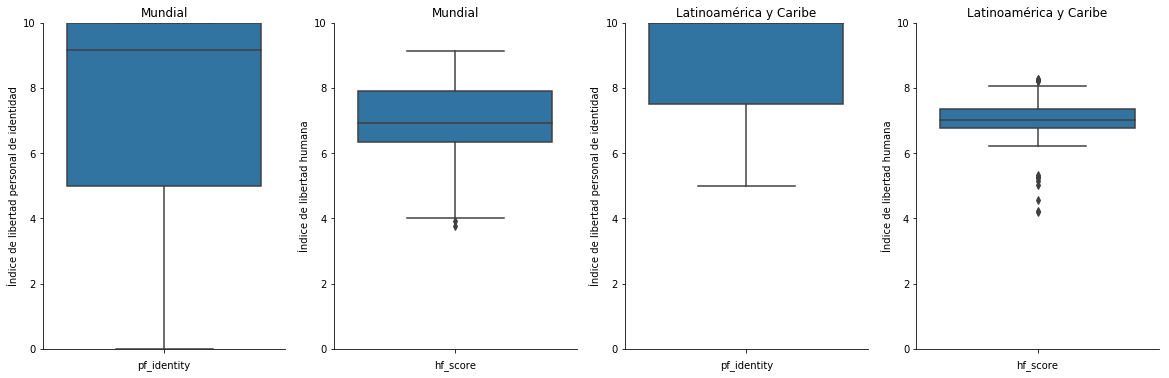

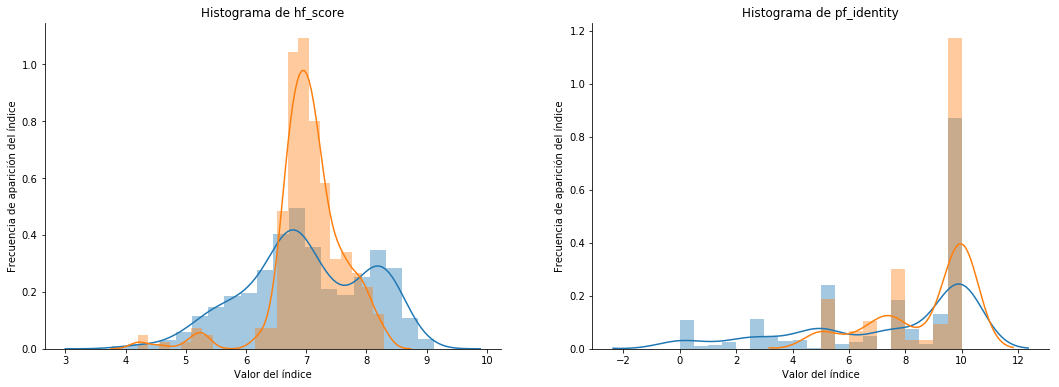

In [8]:
# Se buscan los outliers por dos vías, boxplot e histograma:

# Boxplot:

plt.figure(figsize=(20,6))
plt.subplot(141)
plt.title('Mundial')
gr = sns.boxplot(y=dataset['pf_identity'].dropna())
plt.ylabel('Índice de libertad personal de identidad')
plt.xlabel('pf_identity')
gr.axes.set_ylim(0,10)
sns.despine()

plt.subplot(142)
plt.title('Mundial')
gr = sns.boxplot(y=dataset['hf_score'].dropna())
plt.ylabel('Índice de libertad humana')
plt.xlabel('hf_score')
gr.axes.set_ylim(0,10)
sns.despine()

plt.subplot(143)
plt.title('Latinoamérica y Caribe')
gr = sns.boxplot(y=dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna())
plt.ylabel('Índice de libertad personal de identidad')
plt.xlabel('pf_identity')
gr.axes.set_ylim(0,10)
sns.despine()

plt.subplot(144)
plt.title('Latinoamérica y Caribe')
gr = sns.boxplot(y=dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())
plt.ylabel('Índice de libertad humana')
plt.xlabel('hf_score')
gr.axes.set_ylim(0,10)
sns.despine()

# Histograma:

plt.figure(figsize=(18,6))
plt.subplot(121)
sns.distplot(dataset['hf_score'].dropna(),label='Mundial')
sns.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(),label='LAC')
plt.ylabel('Frecuencia de aparición del índice')
plt.xlabel('Valor del índice')
plt.title('Histograma de hf_score')
sns.despine()

plt.subplot(122)
sns.distplot(dataset['pf_identity'].dropna(),label='Mundial',bins=20)
sns.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(),
             label='LAC',bins=10)
plt.ylabel('Frecuencia de aparición del índice')
plt.xlabel('Valor del índice')
plt.title('Histograma de pf_identity')
sns.despine()

Se usaron dos métodos:

*Boxplot*:

 Se pueden ver que para el caso de *hf_score* tanto en la región de interés como en el valor global hay presencia de outliers. En América Latina y el Caribe hay más outliers que en global, hay un 50% de los paises que tienen índices similares (cercanos a 7) por eso el rango intercuartílico es más acotado, y son pocos los países con niveleles de índice extremos (más que nada bajos). 
 
 En comparación con *pf_identity*, el rango intercuartílico de *hf_score* está más acotado y como los outliers se definen como aquellos valores que que quedan fuera del intervalo [ Q1-1.5*IQR , Q3+1.5*IQR ], esto hace que aumente las posibilidades de que un valor bajo del índice pase a ser un outlier. 
 
 *Histograma*:
 
 En el caso de *hf_score* podemos ver que para el caso global (azul) no se alcanzan a identificar los ouliers en el gráfico, mientras que para América Latina y el Caribe, se pueden ver dos pequeños cúmulos separados de los valores centrales (que se asemejan a una gaussiana).
 
 En el caso de *pf_identity* podemos ver como los datos se agrupan en pequeños grupos, en donde en cada grupo tiene un segmento de valores de índices con mayor frecuencia que los otros. Así se podría pensar que a la distribución global, estos valores bajos no son tan representativos, pero si modificamos los bins (ponemos menos, por ejemplo 4 porque pareciera haber 4 sub-grupos) podemos hacer más suave el gráfico sin que este fenómeno se manifieste.
 
 Respecto a la eliminación de los outliers, entendemos que si bien son valores de índice "alejados" o "anómalos", se trata de valores posibles que deben ser tenidos en cuenta como parte del fenómeno, y de hecho el estudio original hace un detalle de los índices en cada país. Ahora al considerar sólo el fenómeno regional, por ejemplo cuando queremos ajustar un modelo de la libertad humana en la región, podrían ser eliminados esos datos porque son casos extraños.
 

## 2. Agregación de datos

### Resolución:

### 2.1)  Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

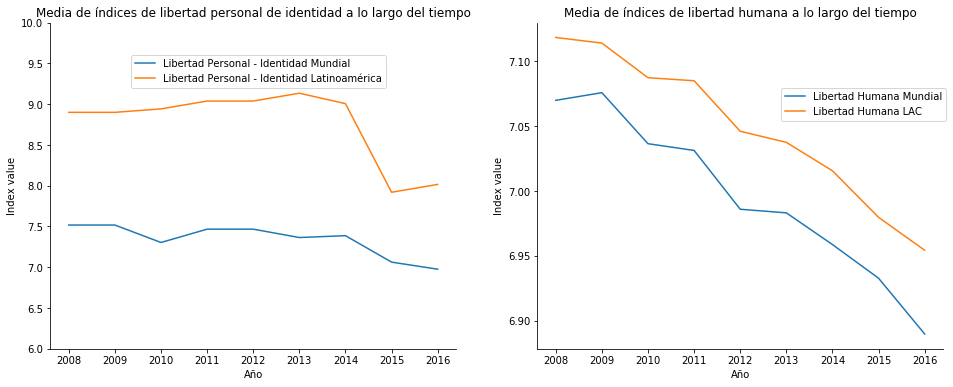

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.lineplot(data=dataset,
                  x='year', y='pf_identity', ci=None)
gr = sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
                  x='year', y='pf_identity', ci=None)
plt.title('Media de índices de libertad personal de identidad a lo largo del tiempo')
plt.ylabel('Index value')
plt.xlabel('Año')
plt.legend(('Libertad Personal - Identidad Mundial','Libertad Personal - Identidad Latinoamérica'),
           bbox_to_anchor=(0.2,0.8), loc=3, borderaxespad=0.)
sns.despine()
gr.axes.set_ylim(6,10)

plt.subplot(122)
sns.lineplot(data=dataset,
                  x='year', y='hf_score', ci=None)
gr=sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
                  x='year', y='hf_score', ci=None)
plt.title('Media de índices de libertad humana a lo largo del tiempo')
plt.ylabel('Index value')
plt.xlabel('Año')
plt.legend(('Libertad Humana Mundial','Libertad Humana LAC'),bbox_to_anchor=(0.6,0.8), loc=2, borderaxespad=0.)
sns.despine()
plt.show()


### 2.2) Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

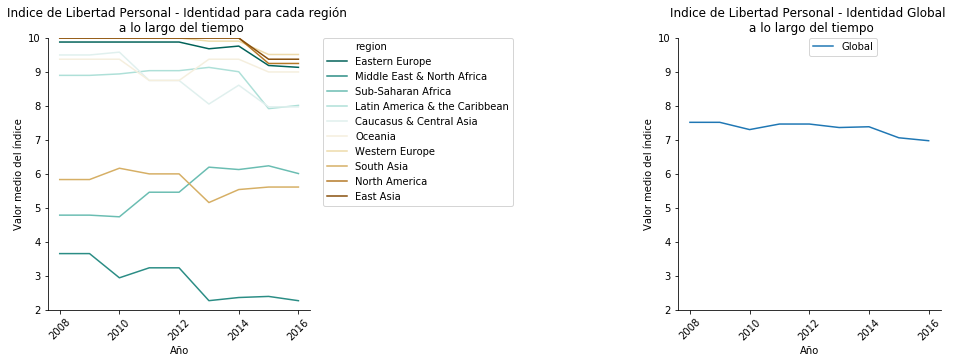

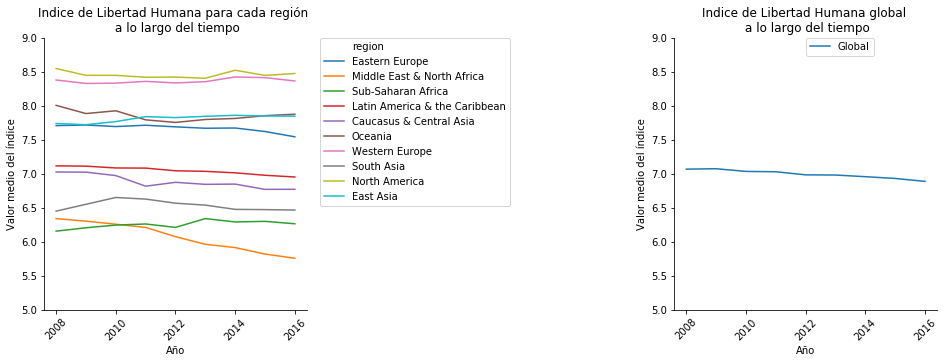

In [10]:
plt.figure(figsize=(16,5))

plt.subplot(131)
gr=sns.lineplot(data=dataset,
                  x='year', y='pf_identity', hue='region', ci=None, palette="BrBG_r")
plt.ylabel('Valor medio del índice')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.title('Indice de Libertad Personal - Identidad para cada región \n a lo largo del tiempo')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
gr.axes.set_ylim(2,10)
sns.despine()

plt.subplot(133)
gr=sns.lineplot(data=dataset,
                  x='year', y='pf_identity', ci=None)
plt.ylabel('Valor medio del índice')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.title('Indice de Libertad Personal - Identidad Global \n a lo largo del tiempo')
plt.legend(('Global',),bbox_to_anchor=(0.5, 1), loc=2, borderaxespad=0.)
sns.despine()
gr.axes.set_ylim(2,10)

plt.figure(figsize=(16,5))

plt.subplot(131)
gr2=sns.lineplot(data=dataset,
                  x='year', y='hf_score', hue='region',ci=None)
plt.title('Indice de Libertad Humana para cada región \n a lo largo del tiempo')
plt.ylabel('Valor medio del índice')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
gr2.axes.set_ylim(5,9)


plt.subplot(133)
gr2=sns.lineplot(data=dataset,
                  x='year', y='hf_score',ci=None)
plt.title('Indice de Libertad Humana global \n a lo largo del tiempo')
plt.ylabel('Valor medio del índice')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(('Global',),bbox_to_anchor=(0.5, 1), loc=2, borderaxespad=0.)
sns.despine()
gr2.axes.set_ylim(5,9)

plt.show()



La tendencia de los índices globales, no se refleja en las tendencias de los índices por región. Si bien ambos ídices globales, son drecrecientes, el análisis por region muestra ídices con tendencias variadas (crecientes o drecrecientes). 

El índice de una región, dificilmente se encuentre relacionado al índice de otra región ya que responde a fenómenos locales, culturales, legislaciones comunes, que es muy dificil que coincidan entre regiones. El índice global se ve poco influenciado por los cambios que ocurran en una región, peroque son muchas las regiones promedidadas.


### 2.3)  Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

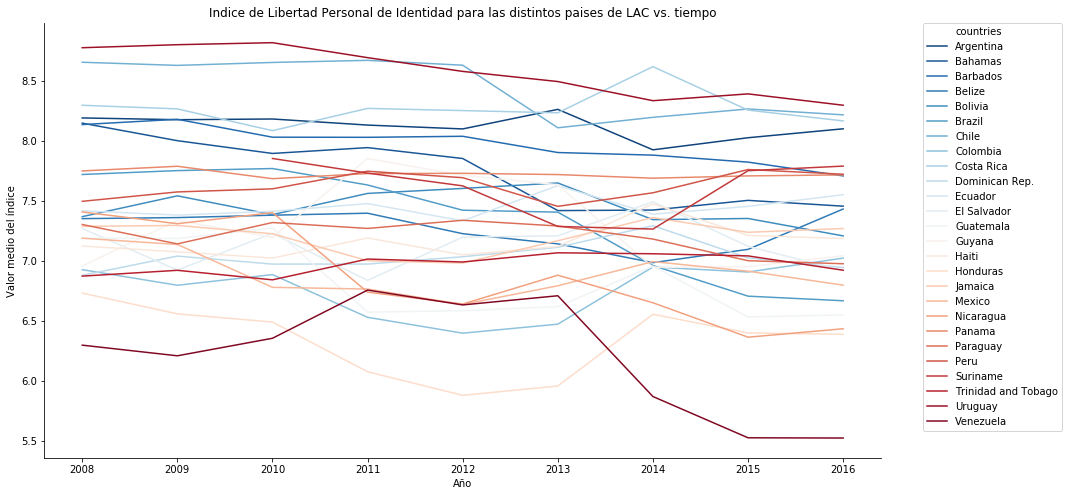

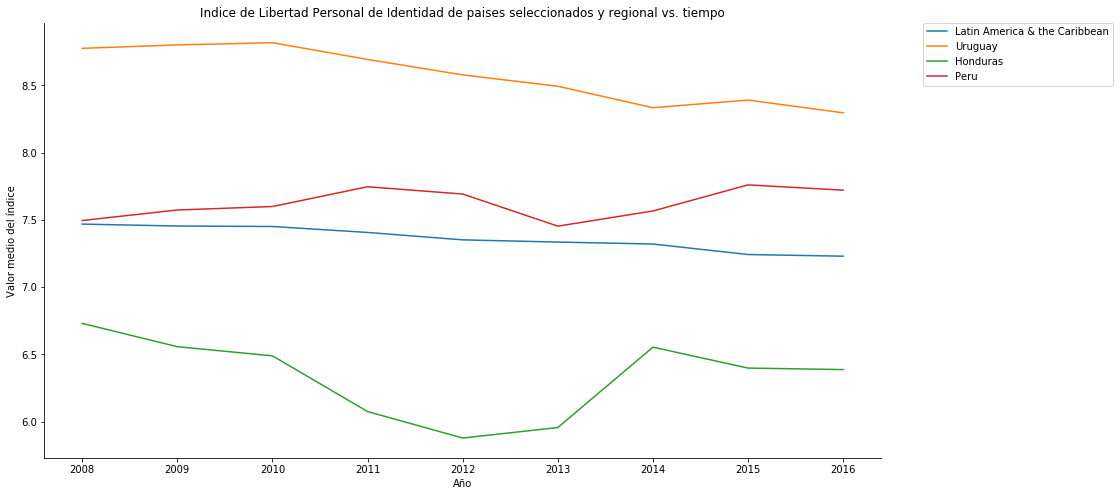

In [11]:

plt.figure(figsize=(15,8))
sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
                  x='year', y='pf_score',hue='countries', ci=None, palette="RdBu_r")
plt.title('Indice de Libertad Personal de Identidad para las distintos paises de LAC vs. tiempo')
plt.ylabel('Valor medio del índice')
plt.xlabel('Año')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

plt.figure(figsize=(15,8))
sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
                  x='year', y='pf_score',ci=None)
sns.lineplot(data=dataset[dataset['countries'] == 'Uruguay'],
                  x='year', y='pf_score', ci=None)
sns.lineplot(data=dataset[dataset['countries'] == 'Honduras'],
                  x='year', y='pf_score', ci=None)
sns.lineplot(data=dataset[dataset['countries'] == 'Peru'],
                  x='year', y='pf_score', ci=None)
plt.title('Indice de Libertad Personal de Identidad de paises seleccionados y regional vs. tiempo')
plt.ylabel('Valor medio del índice')
plt.xlabel('Año')
plt.legend(('Latin America & the Caribbean','Uruguay','Honduras','Peru'),bbox_to_anchor=(1.05, 1),
           loc=2, borderaxespad=0.)
sns.despine()
plt.show()


Primero se graficaron todos los países  de la región, y se seleccionaron en forma visual y aproximada aquellos correspondientes a valores máximo, mínimo y central. Así en la gráfica vemos como la media, que es un etimador sensible a los valores extremos queda contenido en el rango definido por Argentina y Honduras (máximo y mínimo respectivos).

### Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

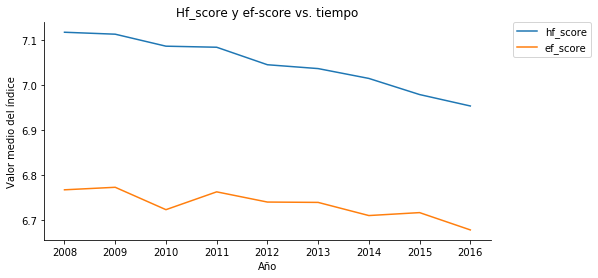

In [12]:
plt.figure(figsize=(8,4))
sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
                  x='year', y='hf_score', ci=None)
sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
                  x='year', y='ef_score', ci=None)
plt.ylabel('Valor medio del índice')
plt.xlabel('Año')
plt.legend(('hf_score','ef_score'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Hf_score y ef-score vs. tiempo')
sns.despine()

En la gráfica de hf_score y ef_score,  podemos ver que las dos tienen una tendencia decreciente y que podrían estar correlacionados. Esto puedría explicarse al ver la cantidad de sub-índices que pertenecen al tipo ef_score que son tenidos en cuenta en el hf_score. La libertad económica tiene más peso en el cálculo de la libertad humana que la libertad personal.

## 3. Distribuciones

### Resolución 
### 3.1) Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

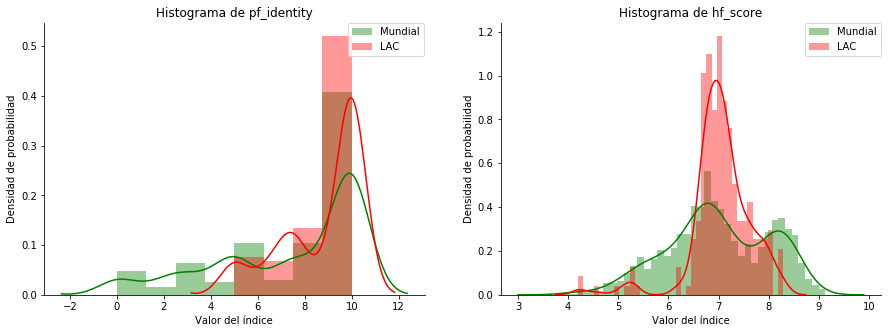

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(dataset['pf_identity'].dropna(),bins=8,color='g', label='Mundial')
sns.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(),
             color='r',bins=4, label='LAC')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valor del índice')
plt.title('Histograma de pf_identity')
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
sns.despine()

plt.subplot(122)
sns.distplot(dataset['hf_score'].dropna(),bins=40,color='g', label='Mundial')
sns.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(),
             color='r',bins=40, label='LAC')
plt.title('Histograma de hf_score')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valor del índice')
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
sns.despine()


In [17]:
def clean_hf_score(dataset):
    hf_score = dataset['hf_score']
    mask_hf_score_outlier = (np.abs(hf_score-hf_score.mean()) <= (2.5*hf_score.std()))
    return dataset[mask_hf_score_outlier]


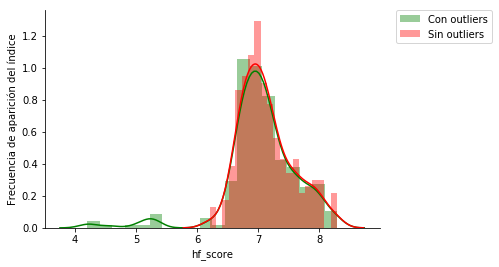

In [20]:
hf_s = clean_hf_score(dataset[dataset['region'] == 'Latin America & the Caribbean'])
sns.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'],
             bins=20,color='g',label='Con outliers')
sns.distplot(hf_s['hf_score'],bins=20,color='r',label='Sin outliers')
plt.ylabel('Frecuencia de aparición del índice')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

En *pf_identity*, vemos que pf_identity termina comportándose como una variable cuantitativa discreta, y en ese caso no se puede aproximar una funcion de densidad de probabilidad. Sí se puede asociar una probabilidad a cada uno de los valores que puede adoptar la variable.

En *hf_score* se puede asociar la variable mundial con una distribución bimodal, en donde cada pico de la distribución se podría asociar con una gaussiana. En definitiva la distribución de la variable sería una mezcla de gaussianas. 

En el caso de *hf_score* en América Latina y el Caribe, se ve una distribución cercana a una gaussiana con algunos valores de índice que pueden ser tomados como outliers.

Si vemos con más detalle el histograma,se puede ver que en la cola derecha hay una pequeña elevación, que sería consecuente con la distribución global, nada más que la segunda gaussiana no tiene tanta presencia en la región.

### 3.2) Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.


In [25]:
mean_co=dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna().mean()
std_co=dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna().std()
z_co=(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna()-mean_co)/std_co

mean_so=hf_s['hf_score'].dropna().mean()
std_so=hf_s['hf_score'].dropna().std()
z_so=(hf_s['hf_score'].dropna()-mean_so)/std_so

KS_co=stats.kstest(z_co,'norm')
KS_so=stats.kstest(z_so,'norm')

print('Test Kolmogorov-Smirnof para hf_score CON outliers: \n',KS_co)
print('\n')
print('Test Kolmogorov-Smirnof para hf_score SIN outliers: \n',KS_so)

Test Kolmogorov-Smirnof para hf_score CON outliers: 
 KstestResult(statistic=0.1504746027707088, pvalue=4.737935317381503e-05)


Test Kolmogorov-Smirnof para hf_score SIN outliers: 
 KstestResult(statistic=0.09652547135948158, pvalue=0.02926686747559102)


A partir del p-value obtenido para el *hf_score* de América Latina y Caribe con los outliers, rechazamos la hipótesis nula, es decir **no** podemos afirmar que la distribución pertenezca a una distribución normal. 

En cambio con el p-value obtenido para el *hf_score* de América Latina y Caribe sin los outliers, p es menor que 0.05 por lo qe se rechaza la hipótesis nula, es decir de nuevo **no** podemos afirmar que la variable tenga una distribución normal. (Pese a esto el valor de p es cercano a 0.05)


### 3.3) Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

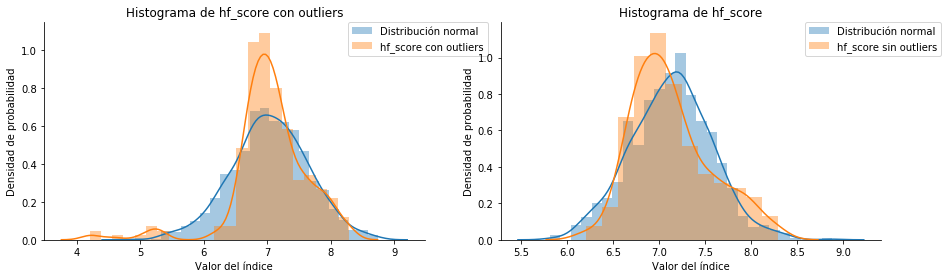

In [28]:
pos, form = stats.norm.fit(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())
norm_dist = stats.norm(pos, form)
sample = norm_dist.rvs(1000)

pos_so, form_so = stats.norm.fit(hf_s['hf_score'].dropna())
norm_dist_so = stats.norm(pos_so, form_so)
sample_so = norm_dist_so.rvs(1000)

plt.figure(figsize=(15,4))
plt.subplot(121)
sns.distplot(sample, label='Distribución normal')
sns.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(),
             label='hf_score con outliers')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valor del índice')
plt.title('Histograma de hf_score con outliers')
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
sns.despine()

plt.subplot(122)
sns.distplot(sample_so, label='Distribución normal')
sns.distplot(hf_s['hf_score'].dropna(),label='hf_score sin outliers')
plt.title('Histograma de hf_score')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Valor del índice')
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
sns.despine()



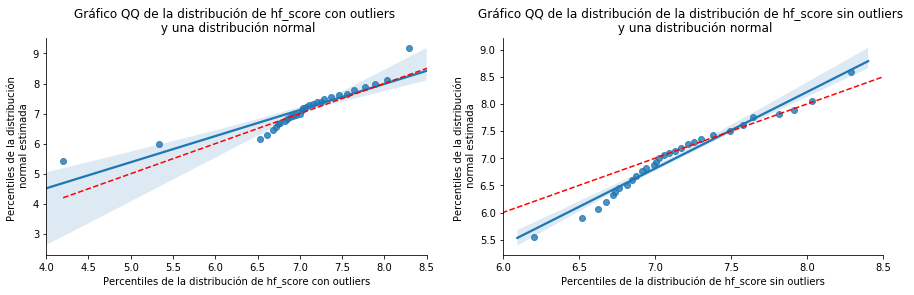

In [37]:
percs = np.linspace(0,100,30) 
qn_sample = np.percentile(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(), percs)
qn_norm_dist = np.percentile(norm_dist.rvs(len(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna()))
                             , percs)
 
qn_sample_so = np.percentile(hf_s['hf_score'].dropna(), percs)
qn_norm_dist_so = np.percentile(norm_dist.rvs(len(hf_s['hf_score'].dropna()))
                             , percs)

plt.figure(figsize=(15,4))

plt.subplot(121)
gr = sns.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la distribución de hf_score con outliers')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score con outliers \n y una distribución normal')
x = np.linspace(np.min((qn_sample.min(), qn_norm_dist.min())), np.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='r', ls="--")
gr.axes.set_xlim(4,8.5)
sns.despine()

plt.subplot(122)
gr=sns.regplot(x=qn_sample_so, y=qn_norm_dist_so)
plt.xlabel('Percentiles de la distribución de hf_score sin outliers')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de la distribución de hf_score sin outliers \n y una distribución normal')
x = np.linspace(np.min((qn_sample_so.min(), qn_norm_dist_so.min())),
                np.max((qn_sample_so.max(),qn_norm_dist_so.max())))
plt.plot(x,x, color='r', ls="--")
gr.axes.set_xlim(6,8.5)
sns.despine()


Con outliers, tanto KS test como el QQ plot, nos indicanque no la variable no se ajustaría a una distribución normal.

Sin los outliers el QQ-plot pareciera indicar que hf_score tiene una distribución normal, está muy cercano a una recta. La recta no tiene sólo una pendiente distinta de la identidad, sino que la ordenada al origen no es nula; la pendiente es mayor, eso indica que la dispersión es mayor en la distribución generada que en la distribución de hf_score.

### 3.4) Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [40]:
skw=stats.skew(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())
skw_so=stats.skew(hf_s['hf_score'].dropna())

print('Asimetría de la distribución de hf_score con outliers: ',skw,'\n')
print('Asimetría de la distribución de hf_score sin outliers: ',skw_so,'\n')

krt=stats.kurtosis(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())
krt_so=stats.kurtosis(hf_s['hf_score'].dropna())

print('Curtosis de la distribución de hf_score con outliers: ',krt,'\n')
print('Curtosis de la distribución de hf_score sin outliers: ',krt_so,'\n')


Asimetría de la distribución de hf_score con outliers:  -1.442092151332142 

Asimetría de la distribución de hf_score sin outliers:  0.6645385961821112 

Curtosis de la distribución de hf_score con outliers:  5.340188962725749 

Curtosis de la distribución de hf_score sin outliers:  -0.04129698484446287 



Para *hf_score* **con outliers**:

La asimetría nos dice que la distribución de *hf_score* es asimétrica negativa y la curtosis nos dice que tenemos una distribución leptocúrtica. Estos dos resultados son consecuentes con la distribución otenida en el histograma.

En el QQ plot, el que sea leptocúrtica, se ve en la concentración bien marcada de puntos cerca del valor 7. 

La asimetría negativa se puede ver cómo los valores a la izquierda del cúmulo central están más dispersos (llegando a valores más lejanos) que los valores a la derecha del cúmulo central (menos disperos, llegana valores no tanto más grandes).

Para *hf_score* **sin outliers**:

La asimetría nos dice que la distribución de *hf_score* es levemente asimétrica positiva (cola derecha más larga o más pesada) y la curtosis nos dice que tenemos una distribución practicamente mesocúrtica, sutilmente platicúrtica. Si bien estos resultados son consecuentes con el histograma obtenido en el punto anterior, el que sea mesocúrtica se puede ver al considerar la distribución normal generada (azul) que sería mesocúrtica por defecto, y ahí vemos que tienen una altua y forma del pico similares.

Al ser mesoocúrtica el QQ plot tiene los datos más distribuidos dentro de todo el rango posible de valores, con una concentración central pero no en una región tan acotada como el caso con outliers



Respecto de la otra información que nos presente el QQ plot, podemos decir que se trata de dos formas complementarias de estudiar la normalidad de la distribución. Aparte de eso nos puede dar información sobre la dispersión,y en algún punto sobre los outliers. 



## 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y las respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 


### Resolución:
### 4.1) ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?


#### Pairplot de Libertad personal de identidad, libertad humana \n y libertad económica mundiales

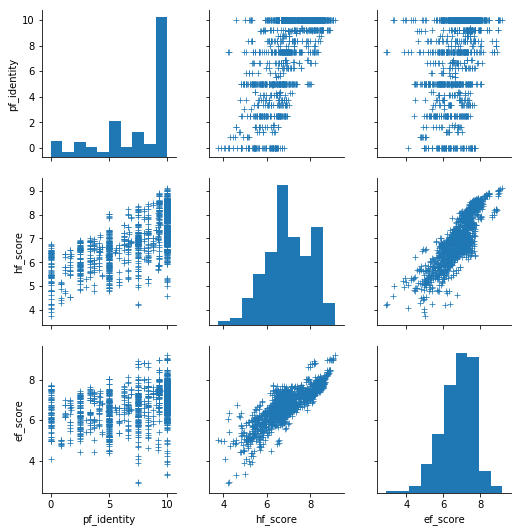

In [53]:
sns.pairplot(
    data=dataset,
    vars=['pf_identity','hf_score','ef_score'],
    markers='+')
plt.show()

#### Pairplot de Libertad personal de identidad, libertad humana \n y libertad económica mundiales

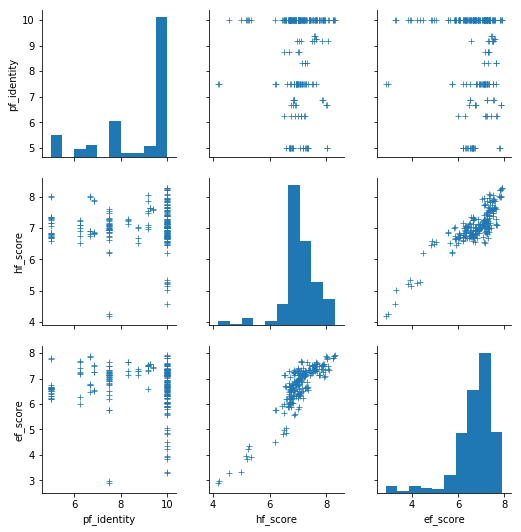

In [55]:
sns.pairplot(
    data=dataset[dataset['region']=='Latin America & the Caribbean'],
    vars=['pf_identity','hf_score','ef_score'],
    markers='+')
plt.show()

Podemos ver que las variables *hf_score* y *ef_score* están fuertemente correlacionadas, mientras que esto no sucede en los casos *pf_identity-hf_score* y *pf_identity-ef_score*. En el caso global, se puede ver una libera correlación positiva en *pf_identity-hf_score*, pero no es tan marcada dada la gran dispersión que se tiene de *hf_score* para cada valor de *pf_identity*.

Se puede ver como para un un valor de *pf_identity* se tiene una gran variabilidad en las libertades económicas, es decir para un mismo valor de libertad personal de identidad (más frecuentemente altos en América Latina), puede haber muy diferentes niveles de libertad económica. 

También se puede ver que el cálculo de *hf_score* ponde mucho peso en la ef_score (al considerar en el promedio muchos más sub-indices que nos hablan de libertad económica). En América Latina, las libertades personales no definen la libertad humana como sí lo hace la libertad económica.


### 4.2) Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

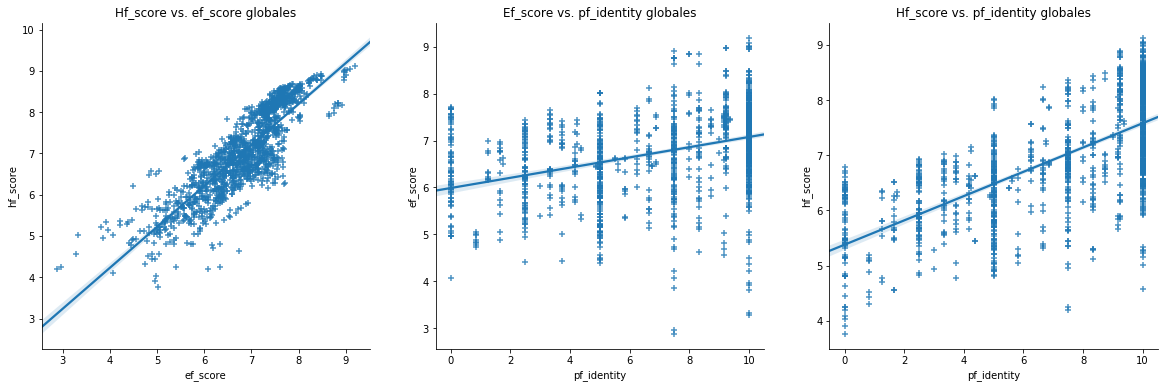

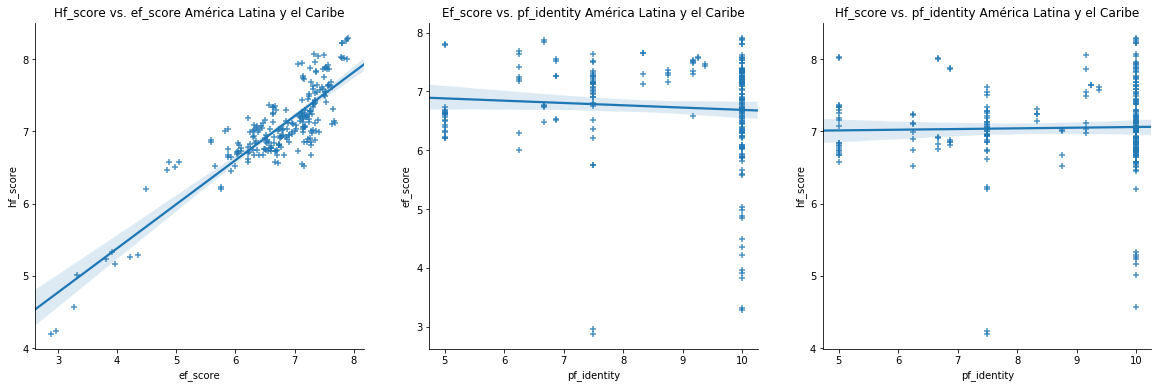

In [65]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.regplot(data=dataset,
                x='ef_score', y='hf_score',
                marker='+')
plt.title('Hf_score vs. ef_score globales')
sns.despine()

plt.subplot(132)
sns.regplot(data=dataset,
                y='ef_score', x='pf_identity',
                marker='+')
plt.title('Ef_score vs. pf_identity globales')
sns.despine()

plt.subplot(133)
sns.regplot(data=dataset,
                y='hf_score', x='pf_identity',
                marker='+')
plt.title('Hf_score vs. pf_identity globales')
sns.despine()

plt.figure(figsize=(20,6))
plt.subplot(131)
sns.regplot(data=dataset[dataset['region']=='Latin America & the Caribbean'],
                x='ef_score', y='hf_score',
                marker='+')
plt.title('Hf_score vs. ef_score América Latina y el Caribe')
sns.despine()

plt.subplot(132)
sns.regplot(data=dataset[dataset['region']=='Latin America & the Caribbean'],
                y='ef_score', x='pf_identity',
                marker='+')
plt.title('Ef_score vs. pf_identity América Latina y el Caribe')
sns.despine()

plt.subplot(133)
sns.regplot(data=dataset[dataset['region']=='Latin America & the Caribbean'],
                y='hf_score', x='pf_identity',
                marker='+')
plt.title('Hf_score vs. pf_identity América Latina y el Caribe')
sns.despine()

Se puede ver una correlación entre *hf_score* y *pf_identy* pero como la dispersión sobre cada punto de la línea es muy grande no es un buen gráfico para sacar conclusiones.

### 4.3) Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 

In [71]:
r=dataset[['hf_score','ef_score']].corr(method='pearson')
print('Coeficiente de correlación de Pearson entre hf_score y ef_score global: \n',r)
print('\n')

r2=dataset[['hf_score','pf_identity']].corr(method='spearman')
print('Coeficiente de correlación de Spearman entre hf_score y pf_identity global: \n',r2)
print('\n')

r3=dataset[['ef_score','pf_identity']].corr(method='spearman')
print('Coeficiente de correlación de Spearman entre ef_score y pf_identity global: \n',r3)
print('\n')


r=dataset[dataset['region']=='Latin America & the Caribbean'][['hf_score','ef_score']].corr(method='pearson')
print('Coeficiente de correlación de Pearson entre hf_score y ef_score LAC: \n',r)
print('\n')

r2=dataset[dataset['region']=='Latin America & the Caribbean'][['hf_score','pf_identity']].corr(method='spearman')
print('Coeficiente de correlación de Spearman entre hf_score y pf_identity LAC: \n',r2)
print('\n')

r3=dataset[dataset['region']=='Latin America & the Caribbean'][['ef_score','pf_identity']].corr(method='spearman')
print('Coeficiente de correlación de Spearman entre ef_score y pf_identity LAC: \n',r3)
print('\n')

Coeficiente de correlación de Pearson entre hf_score y ef_score global: 
           hf_score  ef_score
hf_score  1.000000  0.854865
ef_score  0.854865  1.000000


Coeficiente de correlación de Spearman entre hf_score y pf_identity global: 
              hf_score  pf_identity
hf_score     1.000000     0.686109
pf_identity  0.686109     1.000000


Coeficiente de correlación de Spearman entre ef_score y pf_identity global: 
              ef_score  pf_identity
ef_score     1.000000     0.426993
pf_identity  0.426993     1.000000


Coeficiente de correlación de Pearson entre hf_score y ef_score LAC: 
           hf_score  ef_score
hf_score   1.00000   0.87219
ef_score   0.87219   1.00000


Coeficiente de correlación de Spearman entre hf_score y pf_identity LAC: 
              hf_score  pf_identity
hf_score     1.000000     0.021018
pf_identity  0.021018     1.000000


Coeficiente de correlación de Spearman entre ef_score y pf_identity LAC: 
              ef_score  pf_identity
ef_score      1

|Mundial o LAC|Variable 1|Variable 2|Coef. de Corr.|
|:-----------:|:--------:|:--------:|:------------:|
|Mundial| hf_score|ef_score|0.85|
|Mundial| hf_score|pf_identity|0.68|
|Mundial| ef_score|pf_identity|0.42|
|LAC| hf_score|ef_score|0.87|
|LAC| hf_score|pf_identity|0.021|
|LAC| ef_score|pf_identity|-0.10|

Se obtienen resultados consecuentes a los descriptos en punto anterior. 

En el análisis cuantitativo en América Latina y el Caribe, vemos como *hf_score*, se encuentra correlacionada con *ef_score* dado por el un coeficiente de correlación de Pearson cercano a 1.

En el caso de *pf_identity-ef_score* y *pf_identity-ef_score*, el coeficiente de corrrelación de Spearman reafirma que las variables no están correlacionadas (valores muy cercanos a cero)

El análisis cuantitativo global reafirma lo observado graficamente, *hf_score-ef_score* muestran una fuerte correlación, y acá a diferencia de LAC se ve como entre *hf_score* y *pf_identity* existe una correlación ligera, que se manifiesta en el cofieciente ligeramente por arriba ed 0.5.

### 4.4) [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es categórica, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)

### Conclusiones del Práctico

##### ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.

Tener un valor de libertad personal de identidad de 4.5 es muy bajo tanto para la región como a nivel global. En la región tiene mayor relevancia porque en general se presentean índices muy altos (mediana=10 y media =8.76). De hecho sería un valor que ni si quiera entra en el rango actual de valores que toma ese índice en América Latina [5,10].

##### ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?

A nivel mundial hay un descenso del la libertad de identidad personal promedio entre las regiones. Se puede ver como entre 2014 y 2015 hay una caida de los índices de libertad de identidad de muchas regiones, este comportamiento se refleja pero de forma más marcada en la América Latina y el Caribe. La coincidencia de los años en que se produce este fenómeno con el afianzamiento político de gobiernos de dercha en la región no es un dato menor y podría ser explición en parte de lo observado. Estamos empeorando.
Si bien la caida 2014-2015 es generalizada en varias regiones del mundo, no se manifiesta en el promedio de todas las regiones ya que contrarresta con algunas regiones en las que ha aumentado el pf_identity (Africa Subsahariana).

##### En este estudio, la libertad se mide con dos estimadores principales: hf_score que hace referencia a Human Freedom, y ef_score que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Los dos índices no se relacionan de la misma manera con la libertad de identidad. Tanto el la libertad de identidad (parte de la libertad personal) como la libertad económica son utilizados para determinar la libertad humana. La libertad económica no depende de la libertad personal de identidad y vice-versa en los indicadores que permiten su cálculo, pese a que podría haber fenómenos sociales relacionados a ambos que genereasen una correlación entre las variables el estudio de la correlación entre las variables no indica lo contrario. 
En América Latina pareciera ser que el el índice de libertad que define marcadamente el hf_score es quel relativo a la libertad económica.
